In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
owid = pd.read_csv("owid-covid-data.csv")

In [3]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
owid["date"]=pd.to_datetime(owid["date"]) #convert the date to pandas date time object

In [5]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
owid.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [7]:
owid.isnull().sum()  # find the sum of the nulls in each column 

iso_code                                        0
continent                                   14623
location                                        0
date                                            0
total_cases                                 14540
                                            ...  
population                                   1117
excess_mortality_cumulative_absolute       251918
excess_mortality_cumulative                251918
excess_mortality                           251918
excess_mortality_cumulative_per_million    251918
Length: 67, dtype: int64

In [8]:
owid.drop(["excess_mortality_cumulative_per_million","excess_mortality_cumulative","human_development_index","population"], axis=1, inplace=True)
#drop the unwanted columns

In [9]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,NaN,NaN


In [10]:
owid.drop(["hospital_beds_per_thousand","life_expectancy","handwashing_facilities","extreme_poverty","gdp_per_capita","new_deaths_smoothed","new_cases_smoothed"],axis=1, inplace=True)
#drop the unwanted columns

In [11]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,population_density,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,...,54.422,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [12]:
owid.drop(["population_density","stringency_index","new_people_vaccinated_smoothed_per_hundred","new_cases_per_million","total_cases_per_million"],axis=1, inplace=True)
#drop the unwanted columns

In [13]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,new_people_vaccinated_smoothed,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [14]:
owid.drop(["new_people_vaccinated_smoothed","new_vaccinations_smoothed_per_million","new_vaccinations_smoothed_per_million","total_boosters_per_hundred","total_deaths_per_million","new_cases_smoothed_per_million"],axis=1, inplace=True)

In [15]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_per_million,new_deaths_smoothed_per_million,...,people_fully_vaccinated_per_hundred,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [16]:
owid.drop(["new_deaths_smoothed_per_million","new_deaths_per_million","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred"],axis=1, inplace=True)
#drop the unwanted columns

In [17]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,new_vaccinations_smoothed,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [18]:
owid.drop(["icu_patients","reproduction_rate","new_vaccinations_smoothed"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients_per_million,hosp_patients,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [19]:
owid.drop(["icu_patients_per_million"],axis=1, inplace=True)
#drop the unwanted columns

In [20]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,hosp_patients_per_million,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [21]:
owid.drop(["hosp_patients_per_million"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,weekly_icu_admissions,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [22]:
owid.drop(["weekly_icu_admissions","hosp_patients"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,weekly_icu_admissions_per_million,weekly_hosp_admissions,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [23]:
owid.drop(["weekly_icu_admissions_per_million","weekly_hosp_admissions"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,weekly_hosp_admissions_per_million,total_tests,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [24]:
owid.drop(["weekly_hosp_admissions_per_million","total_tests"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests_per_thousand,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [25]:
owid.drop(["total_tests_per_thousand"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,new_tests_per_thousand,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [26]:
owid.drop(["new_tests_per_thousand"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,new_tests_smoothed,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [27]:
owid.drop(["new_tests","new_tests_smoothed"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests_smoothed_per_thousand,positive_rate,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [28]:
owid.drop(["new_tests_smoothed_per_thousand"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,tests_per_case,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [29]:
owid.drop(["tests_per_case"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,tests_units,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [30]:
owid.drop(["tests_units"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN


In [31]:
owid=owid[owid.location != "Africa"] #remove Africa from the column location as is is for countries only

In [32]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260562,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260563,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260564,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260565,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN


In [33]:
owid=owid[owid.location != "Asia"] #remove Asia from the column location as is is for countries only
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260562,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260563,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260564,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260565,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN


In [34]:
values = ["Europe","European Union","High income","International","Low income","Lower middle income","Oceania","South America","South America","Upper middle income","World"]
owid=owid[owid.location.isin(values)==False] #remove the records in value list from the column location as is is for countries only

In [35]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,excess_mortality_cumulative_absolute,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260562,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260563,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260564,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN
260565,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,NaN,5663.0,0.0,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,NaN,NaN


In [36]:
owid.to_csv("newowid.csv")

In [37]:
owid.drop(["excess_mortality_cumulative_absolute","excess_mortality"],axis=1, inplace=True)
owid.head()
#drop the unwanted columns

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\1608760714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid.drop(["excess_mortality_cumulative_absolute","excess_mortality"],axis=1, inplace=True)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [38]:
owid["total_cases"]=owid["total_cases"].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\3046638232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid["total_cases"]=owid["total_cases"].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [39]:
owid["total_deaths"]=owid["total_deaths"].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\3376690818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid["total_deaths"]=owid["total_deaths"].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [40]:
owid["new_deaths"]=owid["new_deaths"].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\4021383235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid["new_deaths"]=owid["new_deaths"].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [41]:
values2=["positive_rate","total_vaccinations"]
owid[values2]=owid[values2].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\342059247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid[values2]=owid[values2].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [42]:
values5=["people_vaccinated","people_fully_vaccinated","total_boosters","new_vaccinations","median_age","aged_65_older","aged_70_older","cardiovasc_death_rate","diabetes_prevalence","female_smokers","male_smokers"]
owid[values5]=owid[values5].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\3992066309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid[values5]=owid[values5].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [43]:
owid.to_csv("newowid.csv")

In [44]:
owid["new_cases"]=owid["new_cases"].fillna(0)
owid.head()
# fill the null values with zero

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\1259996113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid["new_cases"]=owid["new_cases"].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [45]:
owid.to_csv("newowid.csv")

In [46]:
owid=owid[owid.location != "North America"] #remove North America from the column location as is is for countries only

In [47]:
owid['month'] = owid.date.dt.month #make a new column containing the month which is taken from the date column

C:\Users\20102\AppData\Local\Temp\ipykernel_11560\25977846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owid['month'] = owid.date.dt.month #make a new column containing the month which is taken from the date column


In [48]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2


In [49]:
owid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,2


In [50]:
owid = pd.read_csv("newowid.csv")

In [51]:
owid.head()
owid.to_csv("newowid.csv")

In [52]:
owid.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [ ]:
owid["continent"]=owid["con"].fillna(0)
owid.head()

In [54]:
owid = pd.read_csv("newowid.csv")

In [55]:
owid.to_csv("newowid.csv")

In [56]:
owid.head()

,Unnamed: 0.1,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [57]:
owid.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1, inplace=True)
owid.head()
# drop unwanted columns

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0


In [58]:
owid['smoker_male_number'] = owid['total_deaths'] * owid['male_smokers']/100 #get the number of deaths of males that smoke and got coronavirus

In [59]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,total_boosters,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541


In [60]:
owid['smoker_female_number'] = owid['total_deaths'] * owid['female_smokers']/100 #get the number of deaths of females that smoke and got coronavirus

In [61]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,0.0,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608


In [62]:
owid['total_smokers_death'] = owid['smoker_male_number'] + owid['smoker_female_number']
owid
# get the total number of deaths of people who smoke and got coronavirus

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,18.6,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,19.6,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149


In [63]:
owid['normal_deaths'] = owid['total_deaths'] - owid['total_smokers_death']
# get the value of people that had coronavirus only

In [64]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,2.822,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851


In [65]:
owid.to_csv("newowid.csv")

In [66]:
owid['deathratio'] = owid['normal_deaths'] / owid['total_smokers_death']
owid
# get the ratio of normal deaths agains total smokers death

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [114]:
owid["deathratio"]=owid["deathratio"].fillna(0)
owid.head()
# fill null values with zeros


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
7615,ARG,SAmerica,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,7.441,191.032,5.50,16.2,27.7,0.0,0.0,0.0,0.0,0.0
139790,MEX,NAmerica,Mexico,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,152.783,13.06,6.9,21.4,0.0,0.0,0.0,0.0,0.0
7616,ARG,SAmerica,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,7.441,191.032,5.50,16.2,27.7,0.0,0.0,0.0,0.0,0.0
139791,MEX,NAmerica,Mexico,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,4.321,152.783,13.06,6.9,21.4,0.0,0.0,0.0,0.0,0.0
7617,ARG,SAmerica,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,7.441,191.032,5.50,16.2,27.7,0.0,0.0,0.0,0.0,0.0


In [110]:
owid['continent'] = owid['continent'].replace('SA','SAmerica')
owid['continent'] = owid['continent'].replace('North America','NAmerica')

Q5) As you can see above in the table and in the previous code we made 3 new columns one containing the total smokers deaths per day and the normal deaths happenening per day and we one has the ratio and as seen in row 245939 for every 2 normal deaths there is one smoker death.

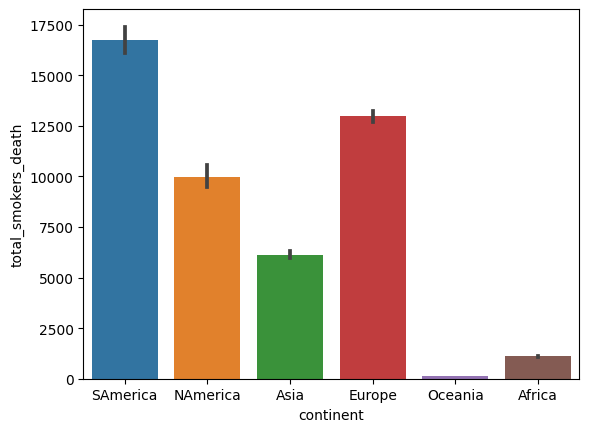

In [111]:
sns.barplot(x="continent", y = "total_smokers_death", data=owid);

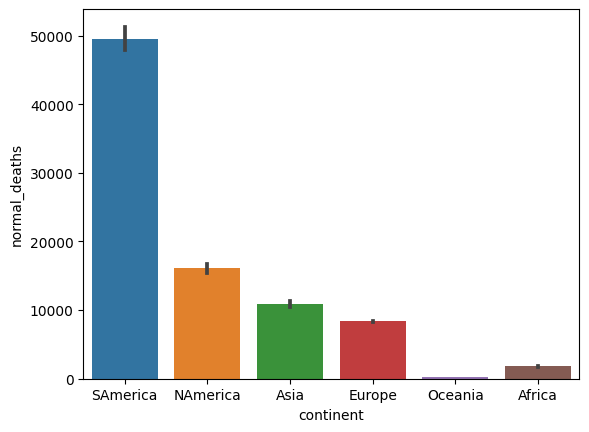

In [112]:
sns.barplot(x="continent", y = "normal_deaths", data=owid);

In [69]:
owid.to_csv("newowid.csv")

In [99]:
# Sort the dataframe by date
owid = owid.sort_values('date')

# Initialize variables to store the first reported case
first_date = None
first_location = None

# Loop through the dataframe and find the first reported case
for i, row in owid.iterrows():
    if row['total_cases'] > 0:
        first_date = row['date']
        first_location = row['location']
        break

print('The first reported case of COVID-19 was in', first_location, 'on', first_date)
# sort the values by the date and then locate the first recorded case and  in which country

The first reported case of COVID-19 was in South Korea on 2020-01-22 00:00:00


In [78]:
owid["date"]=pd.to_datetime(owid["date"])

In [79]:
owid['months'] = owid['date'].dt.month

In [81]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,months
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975,2


In [82]:
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall'}
owid['months'] = owid['months'].replace(seasons)
# check the months in the month column and change it with the seasons

In [85]:
owid.rename(columns={"months": "season"}, inplace=True)
owid.head()
# rename the month column to season

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio,season
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Winter


<Axes: xlabel='season', ylabel='new_cases'>

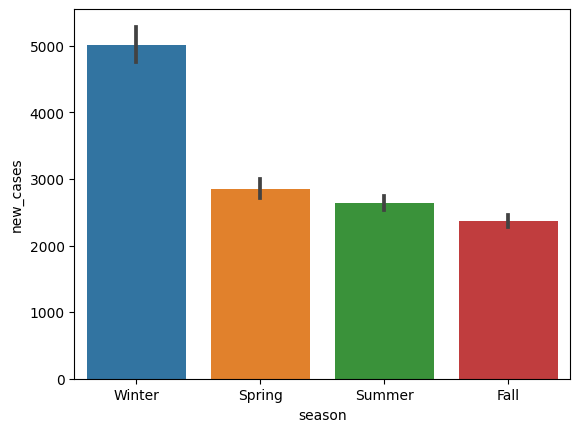

In [86]:
sns.barplot(data = owid, x="season", y="new_cases")
# show the new cases for each season

In [88]:
owid['months'] = owid['date'].dt.month

<Axes: xlabel='months', ylabel='total_cases'>

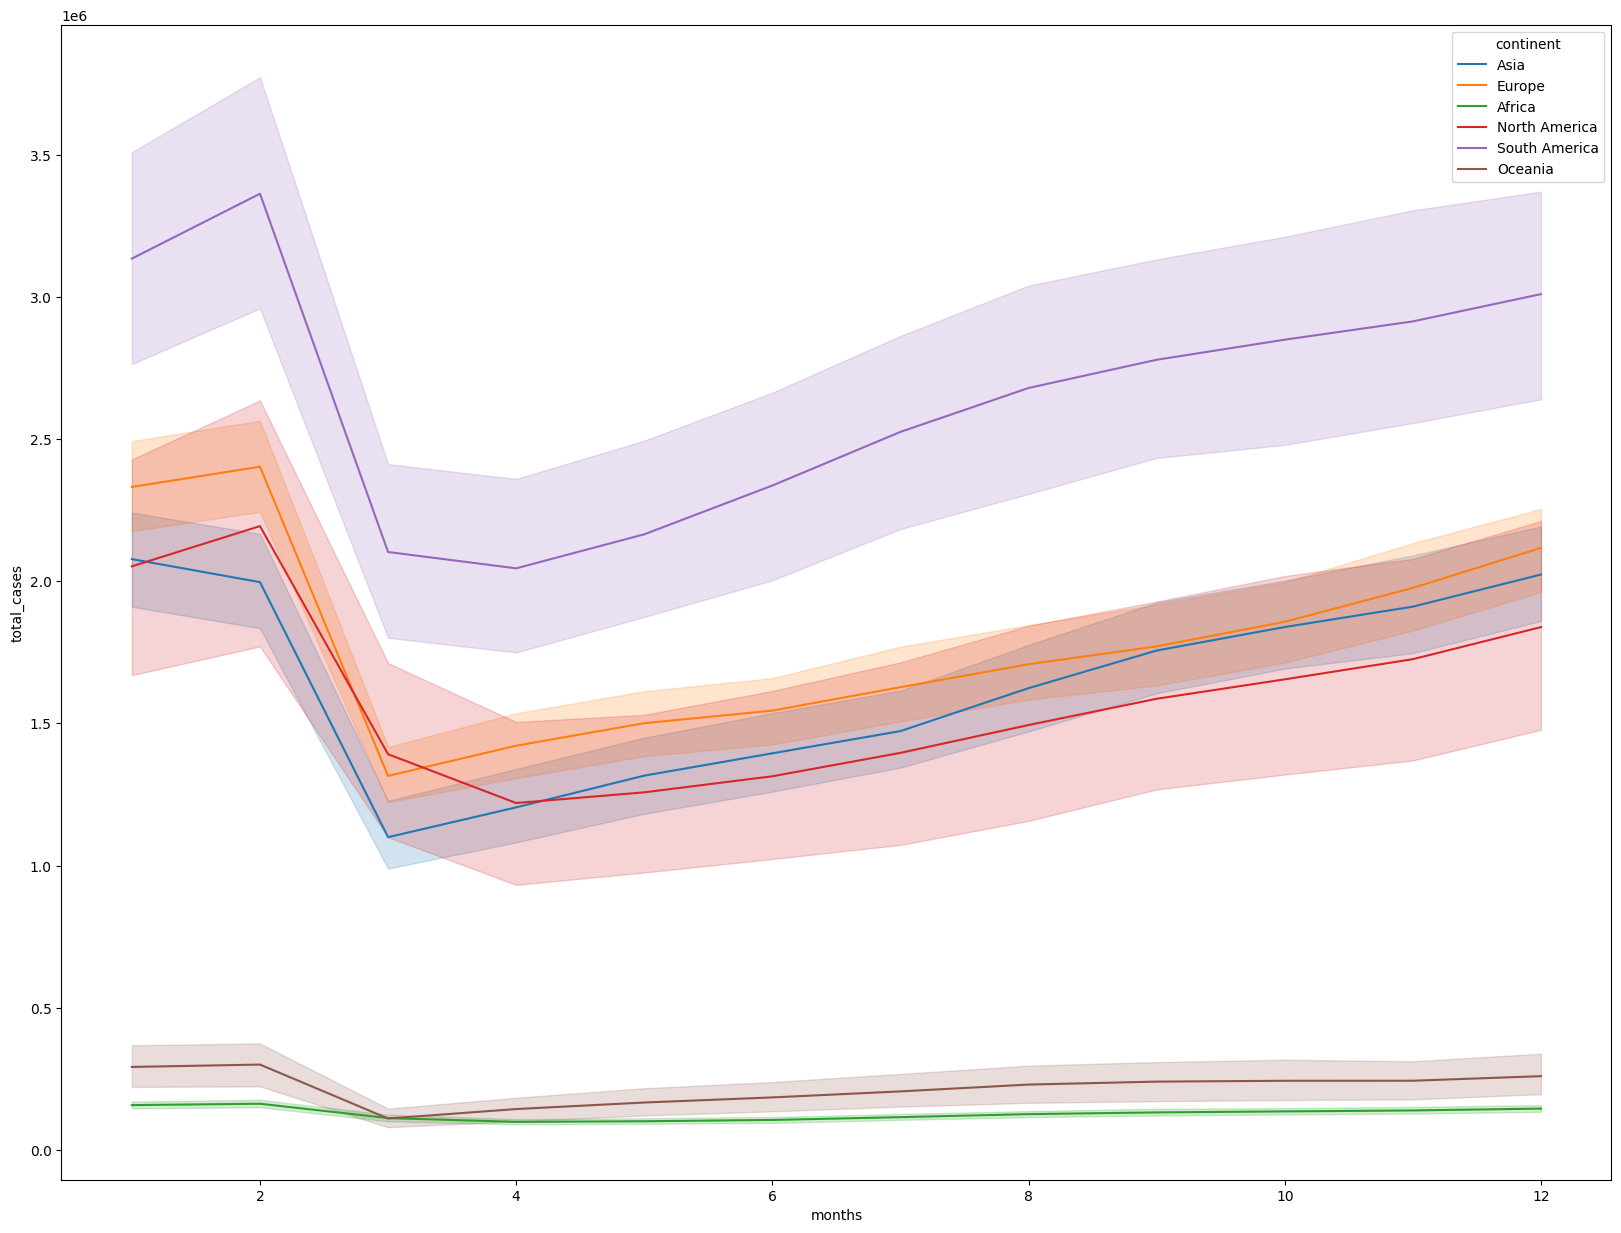

In [89]:
plt.subplots(figsize=(20, 15))
sns.lineplot(x="months", y="total_cases", hue="continent", data=owid)
# show the increase of total cases in each continent along the months

In [90]:
owid = pd.read_csv("newowid.csv")
owid

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [91]:
owid.drop(["Unnamed: 0"],axis=1, inplace=True)
owid.head()
# remove unwanted  column

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,season,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,597.029,9.59,0.0,0.0,Winter,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245939,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975
245940,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975
245941,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975
245942,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,307.846,1.82,1.6,30.7,Winter,1738.541,90.608,1829.149,3833.851,2.095975


In [92]:
owid["date"]=pd.to_datetime(owid["date"]) #convert the date to pandas date time object

In [93]:
owid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247072,ZWE,Africa,Zimbabwe,2023-02-23,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247073,ZWE,Africa,Zimbabwe,2023-02-24,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247074,ZWE,Africa,Zimbabwe,2023-02-25,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975
247075,ZWE,Africa,Zimbabwe,2023-02-26,263921.0,0.0,5663.0,0.0,0.0,0.0,...,1.882,307.846,1.82,1.6,30.7,1738.541,90.608,1829.149,3833.851,2.095975


In [94]:
owid.replace([np.inf, -np.inf], np.nan, inplace=True)
# remove the infinite values

In [96]:
owid["deathratio"]=owid["deathratio"].fillna(0)
owid.head()
# remove the null values and replace it with zeros

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,positive_rate,total_vaccinations,...,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,smoker_male_number,smoker_female_number,total_smokers_death,normal_deaths,deathratio
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,1.337,597.029,9.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
owid.to_csv("newowid.csv")